# Causal Discovery on SEASFIRE Dataset

In [1]:
# !pip install pybnesian causallearn pandas networkx matplotlib

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from utils import *

In [2]:
folder = "/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/"#/causal-drought-fire/data/processed/"

In [3]:
import glob
glob.glob(folder + "*.csv")

['/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/rotated_loadings_ws10.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/dataframe_SeasFire_EDID_ET_8D_2001_2021.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/PCA_correlation_matrix_ws10.csv',
 '/home/emiliano/Documents/ISP/meditwin_workshop/causal-drought-fire/data/processed/dataframe_ws10.csv']

In [4]:

data_path = "dataframe_SeasFire_EDID_ET_8D_2001_2021.csv"
df = pd.read_csv(folder+data_path)
df.head()

,Unnamed: 0,drought_ecosystem,drought_distance,drought_severity,drought_ecosys_1M,drought_ecosys_3M,drought_ecosys_6M,drought_ecosys_12M,drought_dist_1M,drought_dist_3M,...,swvl1,swvl2,swvl3,swvl4,t2m_max,t2m_mean,t2m_min,tp,vpd,ws10
0,0,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.305250,0.306393,0.148809,0.306593,282.97388,281.39722,279.44278,76.351990,1.805403,6.368570
1,1,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.296929,0.299654,0.148582,0.308864,279.18283,277.36752,275.49326,34.510662,1.886388,5.340193
2,2,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.293871,0.295429,0.144639,0.307132,281.57010,279.38480,277.04614,54.702568,1.406108,5.256960
3,3,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.299307,0.301484,0.149155,0.306837,280.44977,278.75024,277.02512,24.830835,1.459190,4.545062
4,4,0.0,5.622328,0.0,0.0,0.0,0.0,0.0,5.622328,5.622328,...,0.304691,0.305012,0.148286,0.306945,283.02057,281.62106,279.96985,83.491295,1.752788,6.687118


In [5]:
df.shape[0]/1e6

6.599712

In [6]:
df = df.loc[df.lccs_class_2>80]
df.shape[0]/1e6

0.317906

In [7]:
df.columns

Index(['Unnamed: 0', 'drought_ecosystem', 'drought_distance',
       'drought_severity', 'drought_ecosys_1M', 'drought_ecosys_3M',
       'drought_ecosys_6M', 'drought_ecosys_12M', 'drought_dist_1M',
       'drought_dist_3M', 'drought_dist_6M', 'drought_dist_12M', 'latitude',
       'longitude', 'time', 'cams_co2fire', 'cams_frpfire', 'drought_code_max',
       'drought_code_mean', 'fcci_ba', 'fcci_ba_valid_mask',
       'fcci_fraction_of_burnable_area', 'fcci_fraction_of_observed_area',
       'fcci_number_of_patches', 'fwi_max', 'fwi_mean', 'gfed_ba',
       'gfed_ba_valid_mask', 'gwis_ba', 'gwis_ba_valid_mask', 'lai',
       'lccs_class_0', 'lccs_class_1', 'lccs_class_2', 'lccs_class_3',
       'lccs_class_4', 'lccs_class_5', 'lccs_class_6', 'lccs_class_7',
       'lccs_class_8', 'lst_day', 'mslp', 'ndvi', 'oci_ao', 'oci_censo',
       'oci_ea', 'oci_epo', 'oci_gmsst', 'oci_nao', 'oci_nina34_anom',
       'oci_pdo', 'oci_pna', 'oci_soi', 'oci_wp', 'pop_dens', 'rel_hum', 'skt',
     

In [8]:
selected_vars = ["drought_distance","drought_ecosystem","fwi_mean","ndvi","oci_nao","pop_dens","rel_hum","vpd","t2m_mean"]

In [9]:
data = df[selected_vars].dropna()
data.shape


(316983, 9)

## 1. Structure Learning using PyBnesian

In [10]:
from pybnesian import PC, LinearCorrelation

In [11]:
pcMod = PC()
# the data goes into the inependence test object which is weird
linCorr = LinearCorrelation(data)
alpha = 0.1
g = pcMod.estimate(hypot_test=linCorr, alpha=alpha)

In [12]:
# nodes of graph
g.nodes()

['drought_distance',
 'drought_ecosystem',
 'fwi_mean',
 'ndvi',
 'oci_nao',
 'pop_dens',
 'rel_hum',
 'vpd',
 't2m_mean']

In [13]:
# edges (directed)
g.edges()

[('drought_ecosystem', 'pop_dens')]

In [14]:
# arcs (undirected)
g.arcs()

[('drought_distance', 'drought_ecosystem'),
 ('drought_distance', 'pop_dens'),
 ('drought_ecosystem', 'oci_nao'),
 ('ndvi', 'fwi_mean'),
 ('drought_distance', 'ndvi'),
 ('ndvi', 'rel_hum'),
 ('ndvi', 'pop_dens'),
 ('fwi_mean', 't2m_mean'),
 ('drought_distance', 't2m_mean'),
 ('ndvi', 'vpd'),
 ('vpd', 't2m_mean'),
 ('oci_nao', 'vpd'),
 ('t2m_mean', 'fwi_mean'),
 ('rel_hum', 'fwi_mean'),
 ('vpd', 'oci_nao'),
 ('pop_dens', 'fwi_mean'),
 ('pop_dens', 'rel_hum'),
 ('drought_ecosystem', 'vpd'),
 ('drought_ecosystem', 'fwi_mean'),
 ('rel_hum', 't2m_mean'),
 ('t2m_mean', 'ndvi'),
 ('oci_nao', 'ndvi'),
 ('ndvi', 'drought_ecosystem'),
 ('drought_distance', 'oci_nao'),
 ('rel_hum', 'vpd'),
 ('t2m_mean', 'rel_hum'),
 ('vpd', 'fwi_mean'),
 ('t2m_mean', 'vpd')]

In [15]:
# get parents of fwi_mean
g.parents("fwi_mean")

['ndvi', 'drought_ecosystem', 'rel_hum', 'vpd', 'pop_dens', 't2m_mean']

In [16]:
# number of arcs and edges
print(g.num_arcs())
print(g.num_edges())

28
1


In [17]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [19]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

,drought_distance,drought_ecosystem,fwi_mean,ndvi,oci_nao,pop_dens,rel_hum,vpd,t2m_mean
drought_distance,0,1,0,1,1,1,0,0,1
drought_ecosystem,1,0,1,1,1,1,0,1,0
fwi_mean,0,1,0,1,0,1,1,1,1
ndvi,1,1,1,0,1,1,1,1,1
oci_nao,1,1,0,1,0,0,0,1,0
pop_dens,1,0,1,1,0,0,1,0,0
rel_hum,0,0,1,1,0,1,0,1,1
vpd,0,1,1,1,1,0,1,0,1
t2m_mean,1,0,1,1,0,0,1,1,0


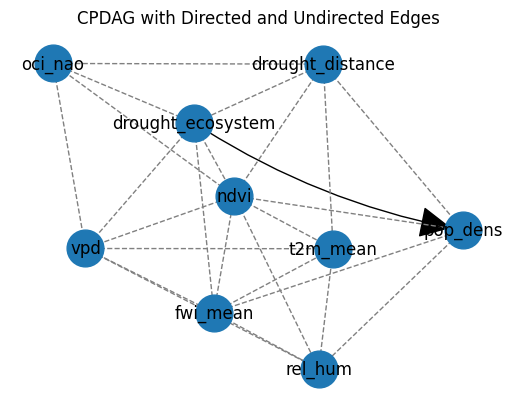

In [20]:
draw_cpdag(arcs, edges, nodes)

### Lets try a nonlinear independence test

In [22]:
from pybnesian import KMutualInformation

In [ ]:
pcMod = PC()
# the data goes into the inependence test object which is weird
km = KMutualInformation(data, k=5)
alpha = 0.1
g = pcMod.estimate(hypot_test=km, alpha=alpha)

In [ ]:
# get the adjacency matrix from edge and arc list
arcs = g.arcs()
edges = g.edges()
nodes = g.nodes()


In [ ]:
adjacency_matrix = get_adjacency_matrix(arcs, edges, nodes)
adjacency_matrix

In [ ]:
draw_cpdag(arcs, edges, nodes)

## 2. Structure Learning using CausalLearn

In [ ]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
from causallearn.utils.GraphUtils import GraphUtils
data_matrix = data.to_numpy()
pc_result = pc(data_matrix, alpha=0.01, indep_test_func=fisherz)
G_pc = GraphUtils.to_nx_graph(pc_result.G)
G_pc.nodes

## 3. Visualize CausalLearn Result

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
nx.draw(G_pc, with_labels=True, node_size=500, font_size=10)
plt.title("Causal Graph (PC - CausalLearn)")
plt.show()

## 4. Compare PyBnesian and CausalLearn Graphs

In [ ]:
from networkx.algorithms.similarity import graph_edit_distance
# PyBnesian graph
G_bn = nx.DiGraph()
for edge in bn.edges():
    G_bn.add_edge(edge[0], edge[1])
# Align nodes
nodes = set(G_bn.nodes()).intersection(set(G_pc.nodes()))
G_bn = G_bn.subgraph(nodes).copy()
G_pc = G_pc.subgraph(nodes).copy()
G_pc_directed = nx.DiGraph(G_pc)
# Graph edit distance
edit_distance = graph_edit_distance(G_bn, G_pc_directed)
print("Graph Edit Distance:", edit_distance)
# Jaccard
edges_bn = set(G_bn.edges())
edges_pc = set(G_pc_directed.edges())
intersection = len(edges_bn & edges_pc)
union = len(edges_bn | edges_pc)
jaccard = intersection / union if union > 0 else 0
print("Edge Jaccard Similarity:", jaccard)
# Precision & Recall
precision = intersection / len(edges_pc) if edges_pc else 0
recall = intersection / len(edges_bn) if edges_bn else 0
print("Precision:", precision)
print("Recall:", recall)

### 5. Additional Graph Distance Metrics: SHD and SID

In [ ]:
# Compute Structural Hamming Distance (SHD) and Structural Intervention Distance (SID)
from causallearn.utils.GraphUtils import to_amat
from causallearn.metrics import SHD, SID

# Create adjacency matrices
nodes_sorted = sorted(nodes)
idx_map = {node: i for i, node in enumerate(nodes_sorted)}

# Initialize adjacency matrices
n = len(nodes_sorted)
amat_bn = [[0]*n for _ in range(n)]
amat_pc = [[0]*n for _ in range(n)]

for u, v in G_bn.edges():
    amat_bn[idx_map[u]][idx_map[v]] = 1

for u, v in G_pc_directed.edges():
    amat_pc[idx_map[u]][idx_map[v]] = 1

# Compute SHD and SID
shd = SHD.shd(amat_bn, amat_pc)
sid = SID.sid(amat_bn, amat_pc)
print("Structural Hamming Distance (SHD):", shd)
print("Structural Intervention Distance (SID):", sid)